In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor




In [2]:
df = pd.read_csv('df.csv')
df.head()

,brand,flavour,volume_per_joghurt_g,packsize,product_id,Unnamed: 0,date,price,units,weekday,weight
0,Mueller,blueberry,150,6,0,0,2020-01-01,4.65,1126.0,Wednesday,1013400.0
1,Mueller,blueberry,150,6,0,1,2020-01-02,4.76,1205.0,Thursday,1084500.0
2,Mueller,blueberry,150,6,0,2,2020-01-03,5.22,1007.0,Friday,906300.0
3,Mueller,blueberry,150,6,0,3,2020-01-04,5.45,1282.0,Saturday,1153800.0
4,Mueller,blueberry,150,6,0,4,2020-01-05,3.33,1037.0,Sunday,933300.0


In [3]:
class random_forest():

    def __init__(self):
        self.reg = None

    def pred(self, x):
        if self.reg is None:
            raise ValueError("train the model first")
        else:
            self.reg.predict(x)
        return self.reg.predict(x)

    def random_forest_on_units(self, x):

        #def y
        y = df[['units']]


        #skip standardization bcs it's unnecessary for tree based models
        #test train split
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

        #fit model
        rf = RandomForestRegressor(n_estimators=100, random_state=42)
        rf.fit(X_train, y_train)

        self.reg = rf

        preds = self.reg.predict(X_test)

        mse = mean_squared_error(y_test, preds)
        r2 = r2_score(y_test, preds)

        


        print(f"MSE: {mse:.3f}\n")
        print(f"R^2: {r2:.3f}\n")
        print(rf.feature_importances_)





In [5]:
x1 = df[['price']]
y = df[['units']]

In [6]:
rf_x1 = random_forest()
rf_x1.random_forest_on_units(x1)

c:\Users\test\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


MSE: 135833.616

R^2: 0.307

[1.]


In [7]:
x2 = df[['brand', 'flavour', 'volume_per_joghurt_g', 'packsize', 'price']]
x3 = df[['brand', 'flavour',  'price']]

dummy_df = pd.get_dummies(x3, columns=['brand', 'flavour'], drop_first=True)

In [8]:
rf_xn = random_forest()
rf_xn.random_forest_on_units(dummy_df)


c:\Users\test\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


MSE: 41938.957

R^2: 0.786

[0.75513195 0.02226854 0.0085416  0.00991372 0.00610091 0.00729324
 0.03298408 0.01183795 0.01014182 0.05367989 0.00748972 0.06415384
 0.01046274]


In [20]:

class gradient_boosting():

    def __init__(self):
        self.reg = None

    def pred(self, x):
        if self.reg is None:
            raise ValueError("train the model first")
        else:
            self.reg.predict(x)
        return self.reg.predict(x)

    def gradient_boosting_on_units(self, x):

        #def y
        y = df[['units']]


        #skip standardization bcs it's unnecessary for tree based models
        #test train split
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

        #fit model
        gb = GradientBoostingRegressor(n_estimators=10000, max_depth=5, learning_rate=0.1, random_state=42)
        gb.fit(X_train, y_train)

        self.reg = gb

        preds = self.reg.predict(X_test)

        mse = mean_squared_error(y_test, preds)
        r2 = r2_score(y_test, preds)

        


        print(f"MSE: {mse:.3f}\n")
        print(f"R^2: {r2:.3f}\n")
        print(gb.feature_importances_)






In [21]:
gb_x1 = gradient_boosting()
gb_x1.gradient_boosting_on_units(x1)

c:\Users\test\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


MSE: 188775.525

R^2: 0.037

[1.]


In [22]:
gb_xn = gradient_boosting()
gb_xn.gradient_boosting_on_units(dummy_df)


c:\Users\test\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


MSE: 59539.724

R^2: 0.696

[0.75444011 0.02034765 0.00451027 0.01150045 0.0023905  0.00716591
 0.04653983 0.01474863 0.0097664  0.05690584 0.00315417 0.0653838
 0.00314642]


In [34]:

class decision_tree():

    def __init__(self):
        self.reg = None

    def pred(self, x):
        if self.reg is None:
            raise ValueError("train the model first")
        else:
            self.reg.predict(x)
        return self.reg.predict(x)

    def decision_tree_on_units(self, x):

        #def y
        y = df[['units']]


        #skip standardization bcs it's unnecessary for tree based models
        #test train split
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

        #fit model
        tree = DecisionTreeRegressor(max_depth=2, random_state=42)
        tree.fit(X_train, y_train)

        self.reg = tree

        preds = self.reg.predict(X_test)

        mse = mean_squared_error(y_test, preds)
        r2 = r2_score(y_test, preds)

        


        print(f"MSE: {mse:.3f}\n")
        print(f"R^2: {r2:.3f}\n")
        print(tree.feature_importances_)






In [24]:
tree_x1 = decision_tree()
tree_x1.decision_tree_on_units(x1)

MSE: 100218.534

R^2: 0.488

[1.]


In [35]:
tree_xn = decision_tree()
tree_xn.decision_tree_on_units(dummy_df)

MSE: 71943.707

R^2: 0.633

[0.91537258 0.         0.         0.         0.         0.
 0.08462742 0.         0.         0.         0.         0.
 0.        ]


In [26]:
#to do
#dynamic pricing
#fine tune gradient boosting
#how does industry do it

### price optimization

In [305]:
def generate_price_data(brand, flavour, price_range, df):


# simulation of price data for Müller and chocolate flavor
    base_case = df.min().copy()
    base_case[brand] = 1
    base_case[flavour] = 1

    price_list = []

    for price in price_range:
        row = base_case.copy()
        row['price'] = price
        price_list.append(row)



    return pd.DataFrame(price_list)
price_df = generate_price_data("brand_Mueller", "flavour_chocolate", np.linspace(1, 10, 100), dummy_df)

       price  brand_Activia  brand_Alnatura  brand_Danone  \
87  8.909091            0.0             0.0           0.0   

    brand_Ecke-Mit-Was-Drin  brand_Ja!  brand_Mueller  brand_Oikos  \
87                      0.0        0.0            1.0          0.0   

    brand_Rewe  flavour_chocolate  flavour_raspberry  flavour_straciatella  \
87         0.0                1.0                0.0                   0.0   

    flavour_strawberry  pred_unit       revenue  
87                 0.0    1146.16  10211.243636  


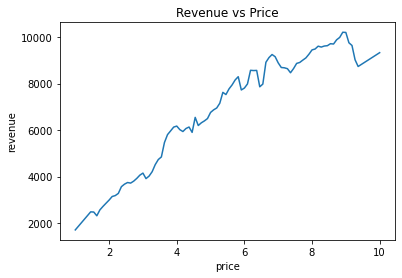

In [299]:
def revenue_optimize(price_df, model):
    revenue_df = price_df.copy()
    revenue_df['pred_unit'] = model.pred(price_df)
    revenue_df["revenue"] = revenue_df['pred_unit'] * revenue_df['price']
    print(revenue_df.query('revenue == revenue.max()'))
    sns.lineplot(data=revenue_df, x='price', y='revenue')
    plt.title("Revenue vs Price")
revenue_optimize(price_df, rf_xn)

       price  brand_Activia  brand_Alnatura  brand_Danone  \
83  8.545455            0.0             0.0           0.0   

    brand_Ecke-Mit-Was-Drin  brand_Ja!  brand_Mueller  brand_Oikos  \
83                      0.0        0.0            1.0          0.0   

    brand_Rewe  flavour_chocolate  flavour_raspberry  flavour_straciatella  \
83         0.0                1.0                0.0                   0.0   

    flavour_strawberry    pred_unit      revenue  
83                 0.0  1057.195835  9034.218955  


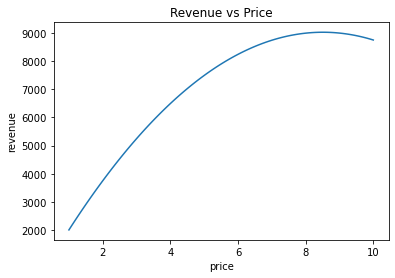

In [300]:
revenue_optimize(price_df, lr_xn)